In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
import numpy as np
import pandas as pd

In [ ]:
%cd "/content/drive/MyDrive/T5_paraphrasing_reference_code"

/content/drive/MyDrive/T5_paraphrasing_reference_code


In [54]:
dataset_input = 'cs_conf_sentence_list_balazs_dhruv'

In [55]:
with open(dataset_input+'.pkl', "rb") as f: 
  M1_input_sentences = pickle.load(f)
  print(f'M1_input_sentences loaded!')

M1_input_sentences loaded!


In [56]:
sentences_df = pd.DataFrame(M1_input_sentences,columns=['sent'])

## Handle Possible Duplicates

In [14]:
sentences_df['sent'].shape

(134001,)

In [15]:
sentences_df.drop_duplicates(['sent'], inplace=True)
sentences_df['sent'].shape

(132073,)

##Handling multiple languages

In [20]:
!pip install langdetect

In [28]:
from langdetect import detect
from langdetect import DetectorFactory
import tqdm.notebook as tq
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [24]:
# set seed
DetectorFactory.seed = 0

# hold label - language
languages = []

# go through each text
for ii in tq.tqdm(range(0,len(sentences_df))):
    # split by space into list, take the first x intex, join with space
    text = sentences_df.iloc[ii]['sent'].split(" ")
    
    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    # ught... beginning of the document was not in a good format
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        # what!! :( let's see if we can find any text in abstract...
        except Exception as e:
            
            try:
                # let's try to label it through the abstract then
                lang = detect(sentences_df.iloc[ii]['sent'])
            except Exception as e:
                lang = "unknown"
                pass
    
    # get the language    
    languages.append(lang)

In [25]:
from pprint import pprint

languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)
    
print("Total: {}\n".format(len(languages)))
pprint(languages_dict)

Total: 132073

{'af': 49,
 'ca': 68,
 'cs': 1,
 'cy': 25,
 'da': 34,
 'de': 43,
 'en': 131154,
 'es': 38,
 'et': 24,
 'fi': 4,
 'fr': 183,
 'hr': 8,
 'hu': 6,
 'id': 60,
 'it': 120,
 'lt': 6,
 'nl': 61,
 'no': 19,
 'pl': 8,
 'pt': 12,
 'ro': 27,
 'sk': 4,
 'sl': 10,
 'so': 8,
 'sq': 7,
 'sv': 32,
 'sw': 28,
 'tl': 28,
 'tr': 1,
 'vi': 5}


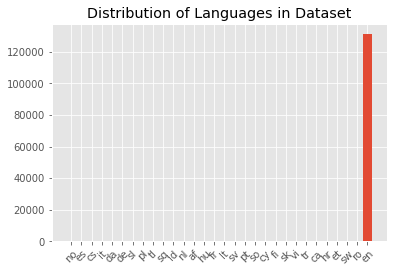

In [29]:
sentences_df['language'] = languages
plt.bar(range(len(languages_dict)), list(languages_dict.values()), align='center')
plt.xticks(range(len(languages_dict)), list(languages_dict.keys()))
plt.title("Distribution of Languages in Dataset")
plt.xticks(rotation=45) 
plt.show()

In [30]:
sentences_df = sentences_df[sentences_df['language'] == 'en'] 
sentences_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131154 entries, 0 to 134000
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   sent      131154 non-null  object
 1   language  131154 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB


##Handle sentences without verbs

In [31]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import nltk
import string
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [34]:
def POS_tags_extract(text):
  text_pos_replaced = text
  text_token = word_tokenize(text)
  text_token_tags = nltk.pos_tag(text_token)
  has_verb = False
  for token_tag in text_token_tags:
    if token_tag[1] == 'VB' or token_tag[1] == 'VBD' or token_tag[1] == 'VBG' or token_tag[1] == 'VBN' or token_tag[1] == 'VBP' or token_tag[1] == 'VBZ':
      has_verb = True
  if has_verb:
    text_filtered = text
  else:
    print(text)
    text_filtered = 'NONE'
  return text_filtered

In [38]:
sentences_df_filtered_no_verbs = []
for tagged_corpus in tq.tqdm_notebook(sentences_df['sent']):
  sentences_df_filtered_no_verbs.append(POS_tags_extract(tagged_corpus))

each article documents either the wikipedia account identification (i d) or internet protocol (ip) address of the editor for each edit, the article size and timestamp for each edit, etc.
our first analysis of time and size differences between two consecutive edits reveals regularity, regardless of an article age and size.
one additional key difference from the previous models of wikipedia
categorical glueing and logical predicates for models of linear logic.
an isbell duality theorem for type refinement systems.
usually lead performance improvement in previous semi-crf work.
these unknown situations correspond to the gap in his knowledge.
the following example illustrates such a scenario.
thus, negation simply swaps belief and doubt.
optical networking for quantum key distribution and quantum communications.
attribute this success to two reasons.
ogc) in the geospatial domain.
the question about how a piece of information (a virus, a rumor, an opinion, etc.
in yellow, the cumulative pr

In [42]:
len(sentences_df_filtered_no_verbs)

131154

In [43]:
while 'NONE' in sentences_df_filtered_no_verbs: sentences_df_filtered_no_verbs.remove('NONE')   

In [47]:
len(sentences_df_filtered_no_verbs)

127888

In [48]:
with open(dataset_input+'_filtered.pkl', 'wb') as f:
  pickle.dump(sentences_df_filtered_no_verbs, f)

In [49]:
sentences_df_filtered_no_verbs

['in the last years wireless communication systems coped with the problem of delivering reliable information while granting high throughput.',
 'several works addressed the parallelization of turbo decoder architectures to achieve higher throughput.',
 'thus, together with flexible and high throughput processing elements, a multi-asip architecture must feature also a flexible and high throughput interconnection backbone.',
 'in this work a general framework to design network on chip based turbo decoder architectures has been presented.',
 'the proposed framework can be adapted to explore different topologies, degrees of parallelism, message injection rates and routing algorithms.',
 'experimental results show that generalized de-bruijn and generalized kautz topologies achieve high throughput with a limited complexity overhead.',
 'moreover, depending on the target throughput requirements different parallelism degrees, message injection rates and routing algorithms can be used to minimi

##BACKUP

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import nltk
import string
lemmatizer = WordNetLemmatizer()

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [ ]:
myStopWords = stopwords.words()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def myTokenizer(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    myTokens = [word.translate(str.maketrans('', '', string.punctuation)) for word in lemmatized_sentence]
    return myTokens

In [ ]:
import tqdm.notebook as tq

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectors = []
vectorizer = TfidfVectorizer(tokenizer=myTokenizer,stop_words=myStopWords,max_features=None) # removing stop words

In [ ]:
vectors = vectorizer.fit_transform(tq.tqdm_notebook(sentences_df["sent"]))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['', 'avon', 'berkalikali', 'bermacammacam', 'bersamasama', 'bersiapsiap', 'bertanyatanya', 'berturutturut', 'could', 'diesis', 'dy', 'f', 'far', 'forum', 'fuss', 'ingatingat', 'kirakira', 'leona', 'leone', 'leonega', 'leonem', 'leonemu', 'leoni', 'leonih', 'leonim', 'leonima', 'leonimi', 'leono', 'leta', 'letak', 'letaka', 'letake', 'letakega', 'letakem', 'letakemu', 'letaki', 'letakih', 'letakim', 'letakima', 'letakimi', 'letako', 'letakšen', 'letakšna', 'letakšne', 'letakšnega', 'letakšnem', 'letakšnemu', 'letakšni', 'letakšnih', 'letakšnim', 'letakšnima', 'letakšnimi', 'letakšno', 'lete', 'letega', 'leteh', 'letej', 'letem', 'letema', 'letemi', 'letemu', 'leti', 'letista', 'letiste', 'letistega', 'letistem', 'letistemu', 'letisti', 'letistih', 'letistim', 'letistima', 'letistimi', 'letisto

In [ ]:
feature_value_df = pd.DataFrame.sparse.from_spmatrix(vectors, columns=vectorizer.get_feature_names())

In [ ]:
feature_value_df

,,aaaaaall,aad,aai,aal,aarogya,aarogyabot,aaron,aatrox,aayan,ab,abandon,abbeel,abbreviate,abbreviated,abbreviation,abc,abcclio,abdication,abe,abeba,aberrational,abet,abide,ability,abinary,ablation,able,abline,abm,abnormal,abnormality,abnormally,aboard,abolish,abomination,abortion,abound,aboutdatablogcom,aboveaverage,...,zhong,zhongxia,zhou,zhu,zibanejad,zicari,ziegler,ziemons,zijing,zillow,zip,zipfilezipfile,zipped,zipper,zippia,zipping,zitnik,zito,ziyech,zj,zlib,zonal,zone,zoo,zookeeper,zoom,zooming,zoph,zorder,zordering,zscore,zscores,zscoring,zstatistic,ztest,ztests,zulie,zumer,zwemer,zzzzzs
0,0.092659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.097939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.089821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.078058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.150540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71218,0.198500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71219,0.133509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71220,0.068511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71221,0.062902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
vocab = np.array(vectorizer.get_feature_names())

In [ ]:
from sklearn import decomposition

clf = decomposition.NMF(n_components=1, random_state=111)

W1 = clf.fit_transform(vectors)
H1 = clf.components_

In [ ]:
cond = (H1[0]-H1[0].mean())/H1[0].std() > 1

In [ ]:
num_words=cond.sum()

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])

In [ ]:
#topic_words[0]

In [ ]:
# nltk.help.upenn_tagset()

In [ ]:
from nltk.tokenize import word_tokenize

def POS_tags_extract(text):
  text_pos_replaced = text
  text_token = word_tokenize(text)
  text_token_tags = nltk.pos_tag(text_token)
  # for token_tag in text_token_tags:
  #   if token_tag[1] == 'NN' or token_tag[1] == 'NNS':
  #     if lemmatizer.lemmatize(token_tag[0]) in topic_words[0]:
  #       text_pos_replaced = text_pos_replaced.replace(token_tag[0],token_tag[1])
  #   if token_tag[1] == 'NNP' or token_tag[1] == 'NNPS':
  #       text_pos_replaced = text_pos_replaced.replace(token_tag[0],token_tag[1])
  for token_tag in text_token_tags:
    if token_tag[1] == 'NN' or token_tag[1] == 'NNS':
      if lemmatizer.lemmatize(token_tag[0]) in topic_words[0]:
        text_pos_replaced = text_pos_replaced.replace(token_tag[0],'<unk>')
    if token_tag[1] == 'NNP' or token_tag[1] == 'NNPS':
        text_pos_replaced = text_pos_replaced.replace(token_tag[0],'<unk>')  
  return text_pos_replaced

In [ ]:
sentences_pos_replaced = []
for tagged_corpus in tq.tqdm_notebook(M1_input_sentences):
  sentences_pos_replaced.append(POS_tags_extract(tagged_corpus))

In [ ]:
with open('./tfidf-pos-dataset/'+dataset_input+'_pos_replaced.pkl', 'wb') as f:
  pickle.dump(sentences_pos_replaced, f)

In [ ]:
sentences_pos_replaced

['Happy <unk> Year!',
 'While this <unk> may be more anecdotal, I feel like this <unk> <unk> a valuable perspective.',
 'You might notice that none of the seven <unk> have anything to do with <unk> <unk> or deep <unk>, and this is not a mistake.',
 'Currently, there is a much higher demand for <unk> that are used in the pre-modeling phases and post-modeling phases.',
 'And so, the seven most recommended <unk> to learn actually overlap with the <unk> of a <unk> analyst, a <unk> <unk>, and a <unk> <unk>.',
 '<unk> is the universal <unk> in the <unk> of <unk>.',
 'Developing strong <unk> <unk> will allow you to take your <unk>, <unk>, and modeling to the next <unk> because you will be able to extract and manipulate the <unk> in advanced <unk>.',
 'Also, writing efficient and scalable <unk> is becoming more and more important for <unk> that work with petabytes of <unk>.',
 'If you think creating <unk> <unk> and storytelling are specific to the <unk> of a <unk> analyst, think again.',
 'Thi

In [ ]:
# from nltk.tokenize import RegexpTokenizer
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# wordnet_lemmatizer = WordNetLemmatizer()

# def myTokenizer(text):
#     myTokens = []
#     tokenizer = RegexpTokenizer(r'\w+')
#     #text_tokens = tokenizer.tokenize(text)
#     # for word in text_tokens:
#     #   myTokens.append(wordnet_lemmatizer.lemmatize(word))
#     myTokens = [wordnet_lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)]
#     print(myTokens)
#     return myTokens


# myStopWords = stopwords.words()

In [ ]:
# feature_value_df.nlargest(20, 'algorithm')

In [ ]:
pd.set_option('display.max_colwidth', None)
print(sentences_df.loc[82190])

sent    our algorithm has two steps: a main algorithm and a post - processing algorithm.
Name: 82190, dtype: object


In [ ]:
total = feature_value_df.sum()

In [ ]:
total.sort_values(ascending=False,inplace=True)

In [ ]:
total_df = total.to_frame()
total_df.columns=['tfidf_sum']
total_df['feature'] = list(total.index)
total_df.reset_index(drop=True, inplace=True) 

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [ ]:
#computing the z-score and select the rows with zscore > 2
total_df_mean=total_df['tfidf_sum'].mean()
total_df_std=total_df['tfidf_sum'].std()
tfidf_filtered = total_df[(((total_df['tfidf_sum']-total_df_mean)/total_df_std)>1)]
#tfidf_filtered[tfidf_filtered['feature']=='thus']
#print(tfidf_filtered['feature'])

In [ ]:
tfidf_filtered[tfidf_filtered['feature']=='electrodes']

In [ ]:
# idf_vector = vectorizer.idf_

In [ ]:
# idf_df = pd.DataFrame(idf_vector,columns=['idf'])
# idf_df['feature'] = vectorizer.get_feature_names()
# #idf_df['idf'].hist(bins=16)

In [ ]:
# #computing the z-score and select the rows with zscore > 2
# idf_df_mean=idf_df['idf'].mean()
# idf_df_std=idf_df['idf'].std()
# idf_filtered = idf_df[idf_df['idf']>12]
# idf_filtered['idf'].hist(bins=16)

In [ ]:
# initializing list 
test_list = M1_input_sentences
  
# printing original list 
#print ("The original list is : " + str(test_list))
  
# initializing substring
subs = 'available at all receivers'
  
# using list comprehension 
# to get string with substring 
res = [i for i in test_list if subs in i]
  
# printing result 
print ("All strings with given substring are : " + str(res))

All strings with given substring are : ['we assume the channel state information ( csi ) is available at all receivers, but not at the transmitters.']
